In [15]:
!pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2MB 32kB/s 
     |████████████████████████████████| 3.0MB 105kB/s 
     |████████████████████████████████| 460kB 54.1MB/s 
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0


In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [2]:
!pip install PyDrive

In [3]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
download = drive.CreateFile({'id': '1rHUJTkZiqXNyhOA2PSD-jNRC6lni9d-9'})
download.GetContentFile('DOWNLOAD.tar')

In [6]:
import zipfile
zipfile_path = '/content/DOWNLOAD.tar'
zip_ref = zipfile.ZipFile(zipfile_path)
zip_ref.extractall('/tmp/')

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
train_path = '/tmp/train'
valid_path = '/tmp/valid'
test_path = '/tmp/test'


In [ ]:
##########################################################################################

In [23]:

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, 5, input_shape=(200, 200, 3) ),
                                    tf.keras.layers.MaxPooling2D((4,4) ),
                                    tf.keras.layers.Conv2D(64, 4),
                                    tf.keras.layers.MaxPooling2D( (3,3)),
                                    tf.keras.layers.Conv2D(128, 3),
                                    tf.keras.layers.MaxPooling2D((2,2)),                                    
                                    tf.keras.layers.Conv2D(56, 2),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Dropout(0.5),                                                                        
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense( 128, activation='relu'), 
                                    tf.keras.layers.Dropout(0.1),                                    
                                    tf.keras.layers.Dense( 256, activation='relu'),                                    
                                    tf.keras.layers.Dropout(0.25),                                    
                                    tf.keras.layers.Dense( 2, activation='softmax') 
])


model.compile( loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'] )

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 196, 196, 32)      2432      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 46, 46, 64)        32832     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 5, 5, 56)         

In [24]:
train_gen = ImageDataGenerator(rescale=1./255,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      rotation_range=40,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

train_datagen = train_gen.flow_from_directory(train_path, target_size=(200,200), 
                                              class_mode='categorical',
                                              batch_size=128)

val_gen = ImageDataGenerator(rescale=1./255)

val_datagen = val_gen.flow_from_directory(valid_path, target_size=(200,200), 
                                            class_mode='categorical',
                                          batch_size=128)



Found 3649 images belonging to 2 classes.
Found 806 images belonging to 2 classes.


In [ ]:
train_datagen.class_indices

{'with_mask': 0, 'without_mask': 1}

In [7]:
history = model.fit_generator(train_datagen, epochs=10, validation_data=val_datagen)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
14/29 [=============>................] - ETA: 17s - loss: 0.6598 - accuracy: 0.6038

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


29/29 [==============================] - 40s 1s/step - loss: 0.5368 - accuracy: 0.7183 - val_loss: 0.2187 - val_accuracy: 0.9181
Epoch 2/10
29/29 [==============================] - 40s 1s/step - loss: 0.3600 - accuracy: 0.8674 - val_loss: 0.2036 - val_accuracy: 0.9330
Epoch 3/10
29/29 [==============================] - 40s 1s/step - loss: 0.3019 - accuracy: 0.8926 - val_loss: 0.1792 - val_accuracy: 0.9442
Epoch 4/10
29/29 [==============================] - 41s 1s/step - loss: 0.3005 - accuracy: 0.8868 - val_loss: 0.1852 - val_accuracy: 0.9467
Epoch 5/10
29/29 [==============================] - 40s 1s/step - loss: 0.2868 - accuracy: 0.9041 - val_loss: 0.2205 - val_accuracy: 0.9132
Epoch 6/10
29/29 [==============================] - 40s 1s/step - loss: 0.2904 - accuracy: 0.8915 - val_loss: 0.1648 - val_accuracy: 0.9404
Epoch 7/10
29/29 [==============================] - 40s 1s/step - loss: 0.2687 - accuracy: 0.9101 - val_loss: 0.1695 - val_accuracy: 0.9442
Epoch 8/10
29/29 [=============

In [8]:
history1 = model.fit_generator(train_datagen, epochs=10, validation_data=val_datagen)

Epoch 1/10
16/29 [===============>..............] - ETA: 16s - loss: 0.2140 - accuracy: 0.9214

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


29/29 [==============================] - 40s 1s/step - loss: 0.2313 - accuracy: 0.9175 - val_loss: 0.1552 - val_accuracy: 0.9392
Epoch 2/10
29/29 [==============================] - 40s 1s/step - loss: 0.2339 - accuracy: 0.9134 - val_loss: 0.1200 - val_accuracy: 0.9591
Epoch 3/10
29/29 [==============================] - 40s 1s/step - loss: 0.2108 - accuracy: 0.9252 - val_loss: 0.1334 - val_accuracy: 0.9615
Epoch 4/10
29/29 [==============================] - 40s 1s/step - loss: 0.2748 - accuracy: 0.8970 - val_loss: 0.1279 - val_accuracy: 0.9591
Epoch 5/10
29/29 [==============================] - 40s 1s/step - loss: 0.2386 - accuracy: 0.9145 - val_loss: 0.1160 - val_accuracy: 0.9690
Epoch 6/10
29/29 [==============================] - 40s 1s/step - loss: 0.2228 - accuracy: 0.9189 - val_loss: 0.1216 - val_accuracy: 0.9566
Epoch 7/10
29/29 [==============================] - 40s 1s/step - loss: 0.2402 - accuracy: 0.9134 - val_loss: 0.1147 - val_accuracy: 0.9640
Epoch 8/10
29/29 [=============

In [9]:
history2 = model.fit_generator(train_datagen, epochs=20, validation_data=val_datagen)

Epoch 1/20
10/29 [=========>....................] - ETA: 23s - loss: 0.2180 - accuracy: 0.9234

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


29/29 [==============================] - 42s 1s/step - loss: 0.1955 - accuracy: 0.9304 - val_loss: 0.0900 - val_accuracy: 0.9615
Epoch 2/20
29/29 [==============================] - 40s 1s/step - loss: 0.1907 - accuracy: 0.9320 - val_loss: 0.0985 - val_accuracy: 0.9578
Epoch 3/20
29/29 [==============================] - 40s 1s/step - loss: 0.1932 - accuracy: 0.9282 - val_loss: 0.1072 - val_accuracy: 0.9603
Epoch 4/20
29/29 [==============================] - 40s 1s/step - loss: 0.1938 - accuracy: 0.9329 - val_loss: 0.0827 - val_accuracy: 0.9715
Epoch 5/20
29/29 [==============================] - 40s 1s/step - loss: 0.1678 - accuracy: 0.9408 - val_loss: 0.0696 - val_accuracy: 0.9739
Epoch 6/20
29/29 [==============================] - 40s 1s/step - loss: 0.1792 - accuracy: 0.9337 - val_loss: 0.1081 - val_accuracy: 0.9603
Epoch 7/20
29/29 [==============================] - 40s 1s/step - loss: 0.1799 - accuracy: 0.9345 - val_loss: 0.0785 - val_accuracy: 0.9727
Epoch 8/20
29/29 [=============

In [22]:
model.save('content/model.h5')

array([[1]], dtype=int32)

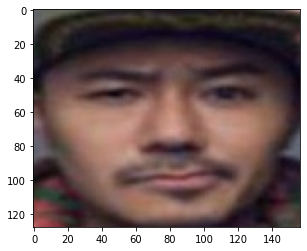

In [ ]:
################ TESTING ##########################
img = cv2.imread('/tmp/test/without_mask/1_0_anhu_0052.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

img = cv2.resize(img, (200,200))
img = np.expand_dims(img, 0)
img.shape

model.predict_classes(img)

In [ ]:
################################################# TRANSFER LEARNING MODEL #############################################

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-01-03 07:52:42--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   282MB/s    in 0.3s    

2021-01-03 07:52:42 (282 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model

model_weights = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pretrained_model = InceptionV3(input_shape=(200,200,3),
                               include_top=False,
                               weights=None)

pretrained_model.load_weights(model_weights)

for layer in pretrained_model.layers:
  layer.trainable=False

pretrained_model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d_194 (Conv2D)             (None, 99, 99, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 99, 99, 32)   96          conv2d_194[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 99, 99, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [ ]:
last_layer = pretrained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_layer_output = last_layer.output


last layer output shape:  (None, 10, 10, 768)


In [ ]:
x = tf.keras.layers.Flatten()(last_layer_output)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(2, activation='softmax')(x)

model_transfer = Model(pretrained_model.input, x)


model_transfer.compile(optimizer= tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_transfer.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d_194 (Conv2D)             (None, 99, 99, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 99, 99, 32)   96          conv2d_194[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 99, 99, 32)   0           batch_normalization_188[0][0]    
___________________________________________________________________________________________

In [ ]:
train_gen = ImageDataGenerator(rescale=1/255, 
                               horizontal_flip=True,
                                shear_range=0.3,
                               zoom_range=0.3,
                               width_shift_range=0.3,
                               height_shift_range=0.3,
                               rotation_range=60,
                               vertical_flip=True)

train_datagen = train_gen.flow_from_directory(train_path, target_size=(200,200), 
                                              class_mode='categorical',
                                              batch_size=64)

val_gen = ImageDataGenerator(rescale=1/255)

val_datagen = val_gen.flow_from_directory(valid_path, target_size=(200,200), 
                                            class_mode='categorical',
                                          batch_size=16)

Found 3649 images belonging to 2 classes.
Found 806 images belonging to 2 classes.


In [ ]:
history = model_transfer.fit_generator(train_datagen, epochs = 10, validation_data=val_datagen )

Epoch 1/10
39/58 [===================>..........] - ETA: 12s - loss: 0.6788 - accuracy: 0.8270

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 44s 756ms/step - loss: 0.5391 - accuracy: 0.8517 - val_loss: 0.0435 - val_accuracy: 0.9876
Epoch 2/10
58/58 [==============================] - 43s 743ms/step - loss: 0.1820 - accuracy: 0.9348 - val_loss: 0.0275 - val_accuracy: 0.9888
Epoch 3/10
58/58 [==============================] - 43s 746ms/step - loss: 0.1393 - accuracy: 0.9518 - val_loss: 0.0322 - val_accuracy: 0.9851
Epoch 4/10
58/58 [==============================] - 43s 739ms/step - loss: 0.1379 - accuracy: 0.9498 - val_loss: 0.0318 - val_accuracy: 0.9864
Epoch 5/10
58/58 [==============================] - 43s 748ms/step - loss: 0.1111 - accuracy: 0.9597 - val_loss: 0.0239 - val_accuracy: 0.9888
Epoch 6/10
58/58 [==============================] - 43s 743ms/step - loss: 0.1022 - accuracy: 0.9652 - val_loss: 0.0311 - val_accuracy: 0.9888
Epoch 7/10
58/58 [==============================] - 43s 740ms/step - loss: 0.0961 - accuracy: 0.9679 - val_loss: 0.0323 - val_accuracy: 0.9888
Epoch 8/10

In [ ]:
model_transfer.save('/content/model_transfer.h5')

In [ ]:
######################################################################################################